In [1]:
import json
import pandas as pd
import numpy as np
import os

In [2]:
run_configs = []
with open("../src/experiment/run_configs/run_configs.json","r") as f:
    for line in f:
        run_configs.append(json.loads(line))


In [3]:
config_df = pd.DataFrame(run_configs)
config_df.set_index("run_number", inplace=True)

In [4]:
results = []
with open("../src/experiment/results/results.json","r") as f:
    for line in f:
        results.append(json.loads(line))

In [5]:
results_df = pd.DataFrame(results)
results_df.set_index("run", inplace=True)

In [6]:
classification_results = []
with open("../src/experiment/results/classification_results.json","r") as f:
    for line in f:
       classification_results.append(json.loads(line))

In [7]:
classification_results_df = pd.DataFrame(classification_results)
classification_results_df.set_index("run", inplace=True)

In [8]:
merged_results_df = pd.merge(config_df,results_df,left_index=True,right_index=True)

In [9]:
merged_results_df = pd.merge(merged_results_df,classification_results_df,left_index=True,right_index=True)

In [10]:
merged_results_df

,seed,zipf_alpha,training_size,true_dist_size,food_list_name,number_of_person,possibilities_size,monofact_rate,miscalibration_rate,facts_to_possible_hallucinations_ratio,estimated_hallucinations_rate,naive_hallucinations_rate,true_hallucinations_rate,accuracy,precision,recall,f1,confusion_matrix
0,42,0.1,800,1000,food_list_small.txt,100,101000,0.995000,0.452007,0.374529,-0.079023,0.027,0.027,0.027,1.000000,0.027,0.052580,"[[0, 0], [973, 27]]"
1,42,0.1,8000,10000,food_list_small.txt,1000,101000,0.924000,0.912587,0.036065,-0.102914,0.157,0.156,0.157,1.000000,0.157,0.271392,"[[0, 0], [843, 157]]"
2,42,0.1,800,1000,food_list_medium.txt,100,311000,1.000000,0.437080,0.375469,-0.060037,0.028,0.028,0.028,1.000000,0.028,0.054475,"[[0, 0], [972, 28]]"
3,42,0.1,8000,10000,food_list_medium.txt,1000,311000,0.975750,0.923799,0.037045,-0.063356,0.197,0.197,0.197,1.000000,0.197,0.329156,"[[0, 0], [803, 197]]"
4,42,0.5,800,1000,food_list_small.txt,100,101000,0.977500,0.447000,0.371240,-0.088227,0.026,0.026,0.026,1.000000,0.026,0.050682,"[[0, 0], [974, 26]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,102,1.5,8000,10000,food_list_medium.txt,1000,311000,0.044000,0.357309,0.002578,-0.394150,0.007,0.007,0.964,0.955953,0.964,0.951773,"[[959, 2], [34, 5]]"
56,102,2.0,800,1000,food_list_small.txt,100,101000,0.017500,0.730000,0.016876,-0.976863,0.000,0.000,0.966,0.933156,0.966,0.949294,"[[966, 0], [34, 0]]"
57,102,2.0,8000,10000,food_list_small.txt,1000,101000,0.006375,0.875635,0.000516,-0.948038,0.000,0.000,0.995,0.990025,0.995,0.992506,"[[995, 0], [5, 0]]"
58,102,2.0,800,1000,food_list_medium.txt,100,311000,0.015000,0.712719,0.016876,-0.962082,0.000,0.000,0.921,0.848241,0.921,0.883124,"[[921, 0], [79, 0]]"


In [11]:
merged_results_df.sort_values(by=["seed","training_size","possibilities_size"], ascending=True)

,seed,zipf_alpha,training_size,true_dist_size,food_list_name,number_of_person,possibilities_size,monofact_rate,miscalibration_rate,facts_to_possible_hallucinations_ratio,estimated_hallucinations_rate,naive_hallucinations_rate,true_hallucinations_rate,accuracy,precision,recall,f1,confusion_matrix
20,15,0.1,800,1000,food_list_small.txt,100,101000,1.000000,0.454000,0.375469,-0.076957,0.046,0.046,0.046,1.000000,0.046,0.087954,"[[0, 0], [954, 46]]"
24,15,0.5,800,1000,food_list_small.txt,100,101000,0.982500,0.453000,0.372180,-0.090167,0.031,0.031,0.031,1.000000,0.031,0.060136,"[[0, 0], [969, 31]]"
28,15,1.0,800,1000,food_list_small.txt,100,101000,0.535000,0.282520,0.233150,-0.228157,0.009,0.009,0.354,0.775106,0.354,0.195937,"[[345, 0], [646, 9]]"
32,15,1.5,800,1000,food_list_small.txt,100,101000,0.090000,0.296643,0.052978,-0.507109,0.001,0.001,0.868,0.885441,0.868,0.807654,"[[867, 0], [132, 1]]"
36,15,2.0,800,1000,food_list_small.txt,100,101000,0.020000,0.768889,0.015938,-1.012315,0.000,0.000,0.970,0.940900,0.970,0.955228,"[[970, 0], [30, 0]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,102,0.1,8000,10000,food_list_medium.txt,1000,311000,0.974250,0.923599,0.037022,-0.064633,0.189,0.188,0.188,1.000000,0.188,0.316498,"[[0, 0], [812, 188]]"
47,102,0.5,8000,10000,food_list_medium.txt,1000,311000,0.940375,0.923189,0.036323,-0.097400,0.225,0.224,0.225,0.999001,0.225,0.365949,"[[1, 0], [775, 224]]"
51,102,1.0,8000,10000,food_list_medium.txt,1000,311000,0.433125,0.563374,0.019004,-0.227516,0.116,0.116,0.612,0.755382,0.612,0.544897,"[[501, 6], [382, 111]]"
55,102,1.5,8000,10000,food_list_medium.txt,1000,311000,0.044000,0.357309,0.002578,-0.394150,0.007,0.007,0.964,0.955953,0.964,0.951773,"[[959, 2], [34, 5]]"


In [12]:
numeric_df = merged_results_df[merged_results_df.select_dtypes(["number"]).columns]

In [13]:
group_1 = numeric_df.groupby(["training_size","zipf_alpha","possibilities_size"])

In [14]:
grouped_results = group_1.agg(['mean', 'std'])

In [15]:
grouped_results

seed            true_dist_size  \
                                              mean        std           mean   
training_size zipf_alpha possibilities_size                                    
800           0.1        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
              0.5        101000              53.00  44.530888         1000.0   
                         311000              50.25  36.772952         1000.0   
              1.0        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
              1.5        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
              2.0        101000              53.00  44.530888         1000.0   
                         311000              53.00  44.530888         1000.0   
8000          0.1        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              0.5        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              1.0        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              1.5        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   
              2.0        101000              53.00  44.530888        10000.0   
                         311000              53.00  44.530888        10000.0   

                                                 number_of_person       \
                                             std             mean  std   
training_size zipf_alpha possibilities_size                              
800           0.1        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              0.5        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              1.0        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              1.5        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
              2.0        101000              0.0            100.0  0.0   
                         311000              0.0            100.0  0.0   
8000          0.1        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              0.5        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              1.0        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              1.5        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   
              2.0        101000              0.0           1000.0  0.0   
                         311000              0.0           1000.0  0.0   

                                            monofact_rate            \
                                                     mean       std   
training_size zipf_alpha possibilities_size                           
800           0.1        101000                  0.995833  0.003819   
                         311000                  0.999167  0.001443   
              0.5        101000                  0.978333  0.003819   
                         311000                  0.993125  0.001250   
     

In [16]:
grouped_results.columns = ['_'.join(col).strip() for col in grouped_results.columns.values]

In [17]:
grouped_results.reset_index(inplace=True)

In [18]:
plot_data_1 = grouped_results[(grouped_results['training_size'] == 800) & (grouped_results['possibilities_size'] == 101000)]

In [19]:
plot_data_2 = grouped_results[(grouped_results['training_size'] == 800) & (grouped_results['possibilities_size'] == 311000)]

In [20]:
plot_data_3 = grouped_results[(grouped_results['training_size'] == 8000) & (grouped_results['possibilities_size'] == 101000)]

In [21]:
plot_data_4 = grouped_results[(grouped_results['training_size'] == 8000) & (grouped_results['possibilities_size'] == 311000)]

In [22]:
def plot_line(ax,data_df,x_name,y_mean_name,y_std_name,color,marker, linestyle, label):
    data_df.plot(x=x_name, y=y_mean_name, marker=marker, linestyle=linestyle, ax=ax,color=color, label=label)
    ax.fill_between(data_df[x_name], 
                data_df[y_mean_name] - data_df[y_std_name], 
                data_df[y_mean_name] + data_df[y_std_name], 
                color=color, alpha=0.3)
    

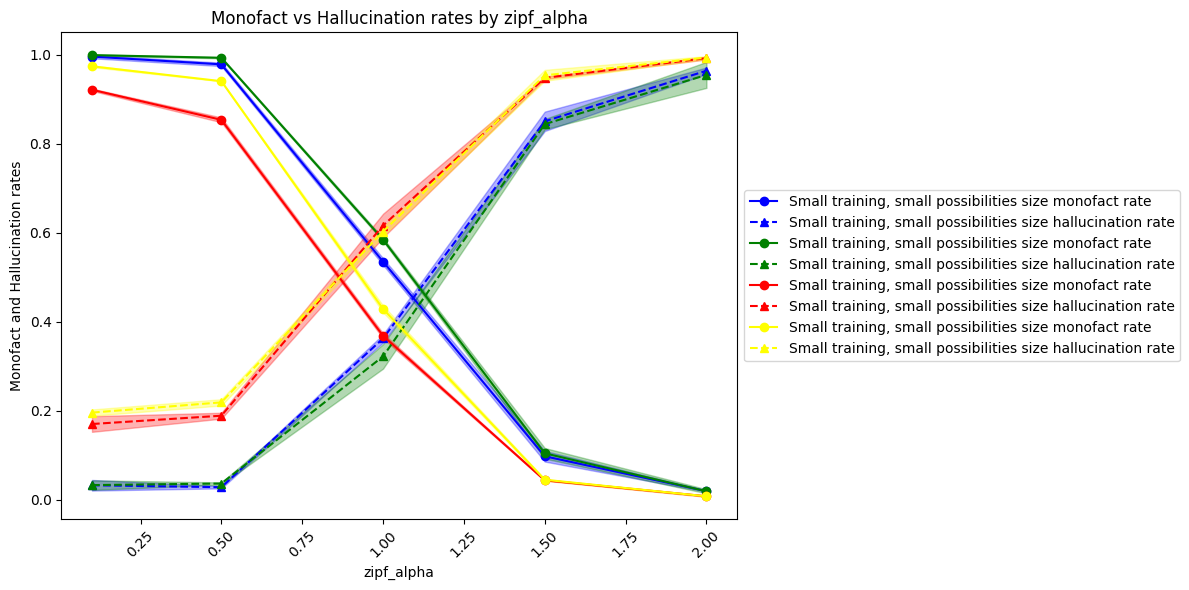

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
plot_line(ax,plot_data_1,"zipf_alpha","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"zipf_alpha","accuracy_mean","accuracy_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")

plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_2,"zipf_alpha","accuracy_mean","accuracy_std","green",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")

plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"zipf_alpha","accuracy_mean","accuracy_std","red",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")

plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","yellow",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_4,"zipf_alpha","accuracy_mean","accuracy_std","yellow",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")


# # Large possibilities size
# plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
# plot_line(ax,plot_data_2,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","green",marker="^",linestyle="--",label="Small training, large possibilities size hallucination rate")
# 
# # Large training size
# # Small possibilities size
# plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
# plot_line(ax,plot_data_3,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size hallucination rate")
# # Large possibilities size 
# plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
# plot_line(ax,plot_data_4,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","red",marker="^",linestyle="--",label="Large training, large possibilities size hallucination rate")


# Add labels and title
ax.set_xlabel('zipf_alpha')
ax.set_ylabel('Monofact and Hallucination rates')
ax.set_title('Monofact vs Hallucination rates by zipf_alpha')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

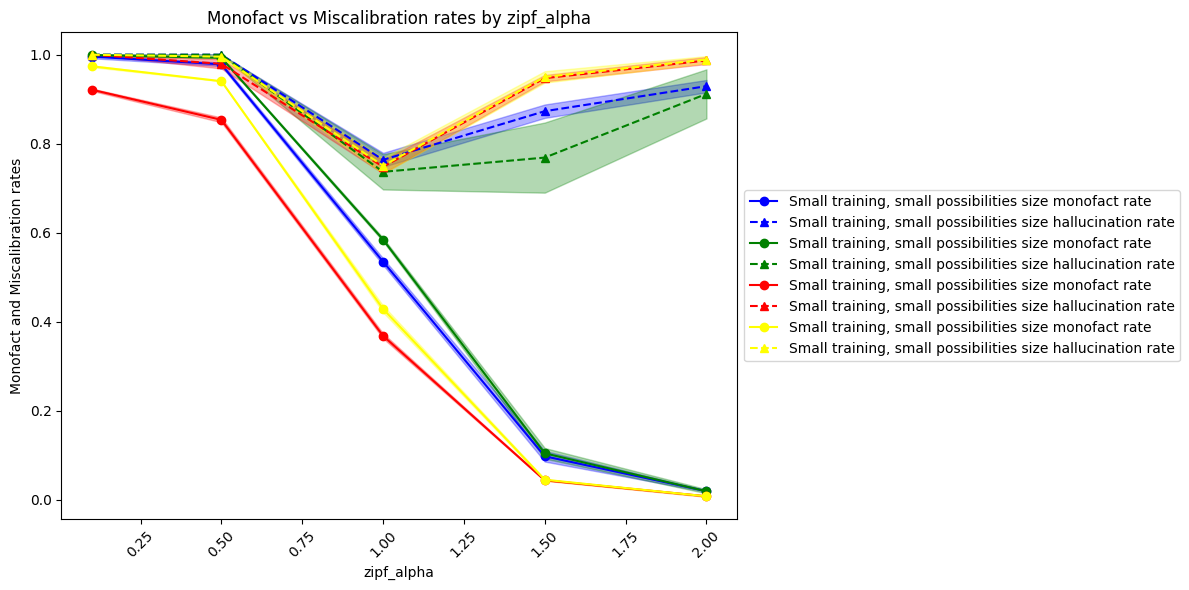

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

plot_line(ax,plot_data_1,"zipf_alpha","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"zipf_alpha","precision_mean","precision_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")

plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_2,"zipf_alpha","precision_mean","precision_std","green",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")

plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"zipf_alpha","precision_mean","precision_std","red",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")

plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","yellow",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_4,"zipf_alpha","precision_mean","precision_std","yellow",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")


# Add labels and title
ax.set_xlabel('zipf_alpha')
ax.set_ylabel('Monofact and Miscalibration rates')
ax.set_title('Monofact vs Miscalibration rates by zipf_alpha')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

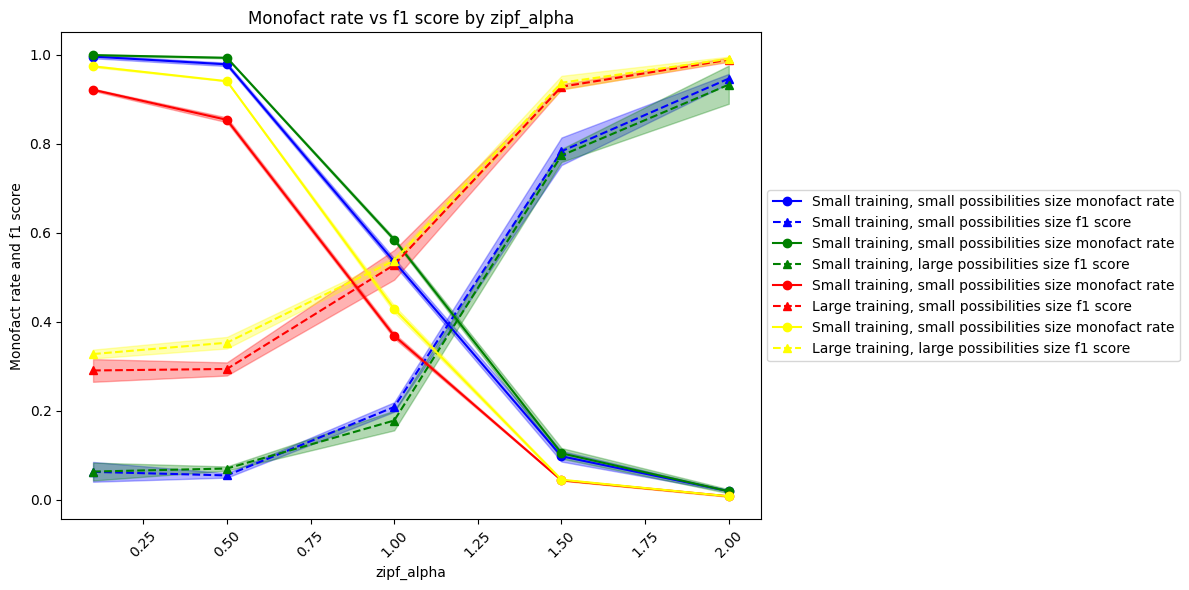

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

plot_line(ax,plot_data_1,"zipf_alpha","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"zipf_alpha","f1_mean","f1_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size f1 score")

plot_line(ax,plot_data_2,"zipf_alpha","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_2,"zipf_alpha","f1_mean","f1_std","green",marker="^",linestyle="--",label="Small training, large possibilities size f1 score")

plot_line(ax,plot_data_3,"zipf_alpha","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"zipf_alpha","f1_mean","f1_std","red",marker="^",linestyle="--",label="Large training, small possibilities size f1 score")

plot_line(ax,plot_data_4,"zipf_alpha","monofact_rate_mean","monofact_rate_std","yellow",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_4,"zipf_alpha","f1_mean","f1_std","yellow",marker="^",linestyle="--",label="Large training, large possibilities size f1 score")


# Add labels and title
ax.set_xlabel('zipf_alpha')
ax.set_ylabel('Monofact rate and f1 score')
ax.set_title('Monofact rate vs f1 score by zipf_alpha')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
plot_data_5 = grouped_results

C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3472721386.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3472721386.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


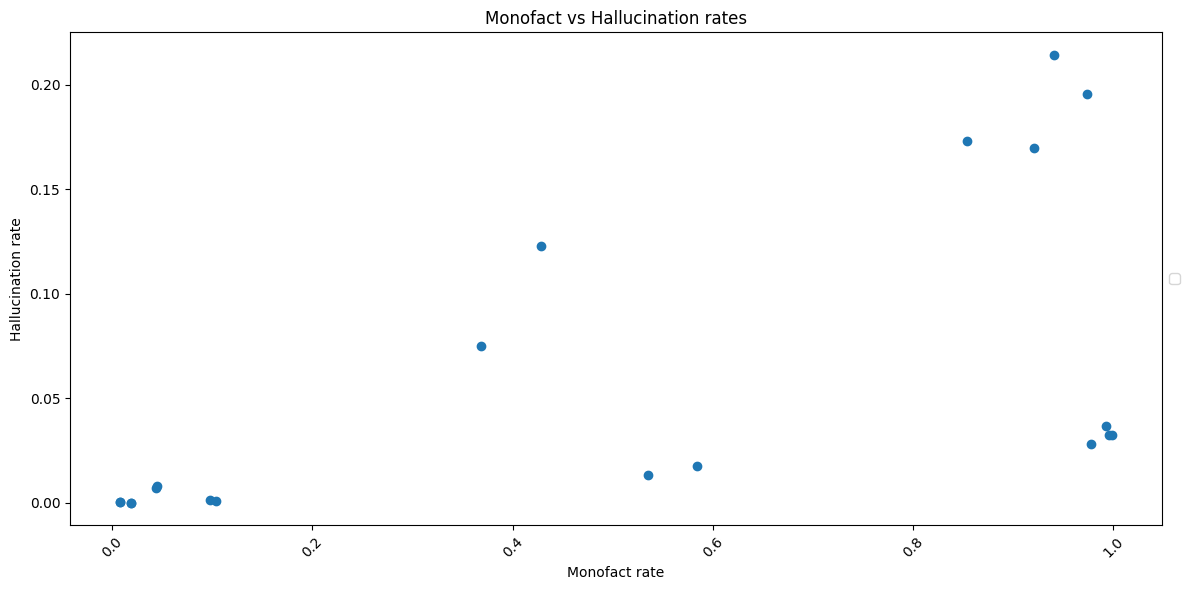

In [142]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)


ax.plot(plot_data_5['monofact_rate_mean'], plot_data_5['true_hallucinations_rate_mean'], 'o')  # 'o' for scatter plot
ax.set_xlabel('Monofact rate')
ax.set_ylabel('Hallucination rate')
#plot_line(ax,plot_data_1,"zipf_alpha","true_hallucinations_rate_mean","true_hallucinations_rate_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")


ax.set_title('Monofact vs Hallucination rates')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

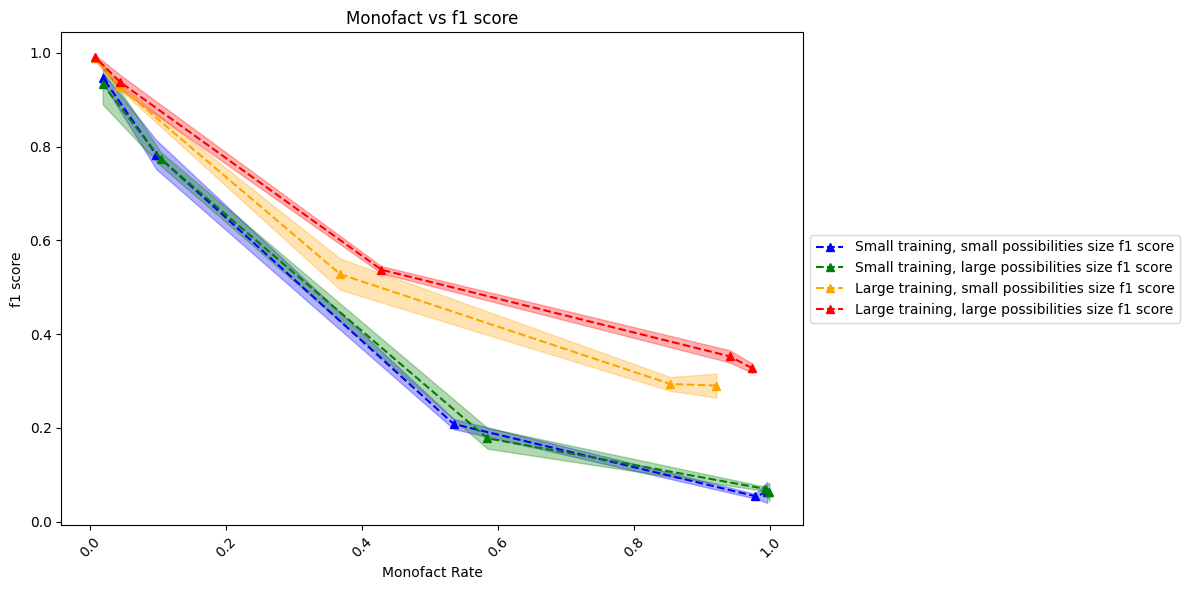

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"monofact_rate_mean","f1_mean","f1_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size f1 score")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"monofact_rate_mean","f1_mean","f1_std","green",marker="^",linestyle="--",label="Small training, large possibilities size f1 score")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"monofact_rate_mean","f1_mean","f1_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size f1 score")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"monofact_rate_mean","f1_mean","f1_std","red",marker="^",linestyle="--",label="Large training, large possibilities size f1 score")

# Add labels and title
ax.set_xlabel('Monofact Rate')
ax.set_ylabel('f1 score')
ax.set_title('Monofact vs f1 score')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

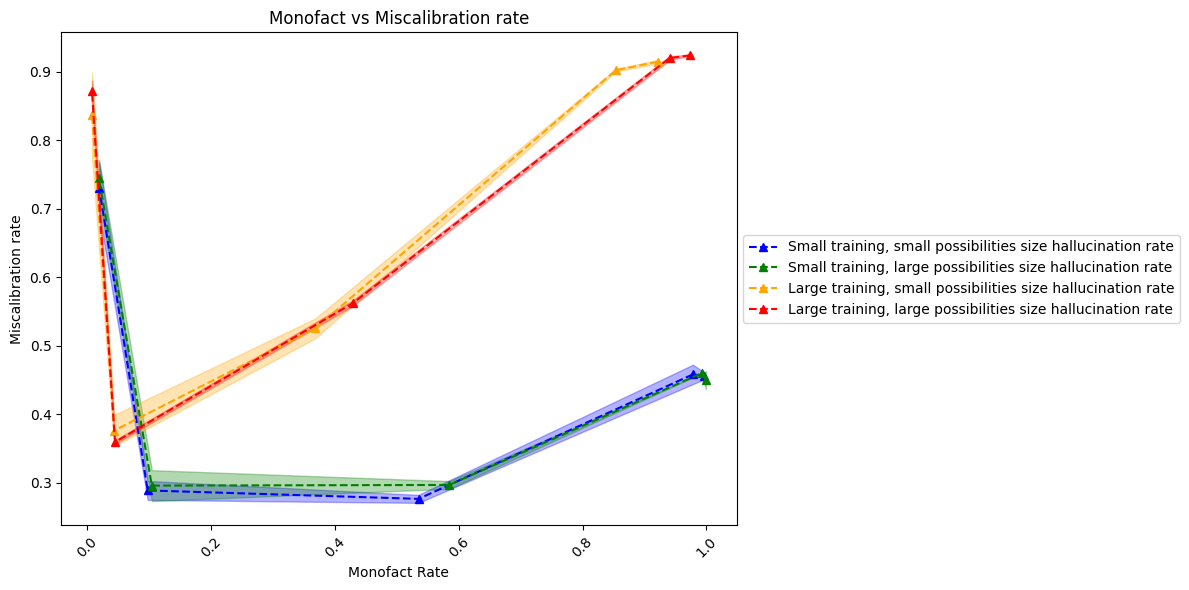

In [147]:
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","green",marker="^",linestyle="--",label="Small training, large possibilities size hallucination rate")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size hallucination rate")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","red",marker="^",linestyle="--",label="Large training, large possibilities size hallucination rate")

# Add labels and title
ax.set_xlabel('Monofact Rate')
ax.set_ylabel('Miscalibration rate')
ax.set_title('Monofact vs Miscalibration rate')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [157]:
plot_data_1_calibration = plot_data_1
plot_data_2_calibration = plot_data_2
plot_data_3_calibration = plot_data_3
plot_data_4_calibration = plot_data_4
plot_data_1_calibration["miscalibration_rate_mean"] = 1 - plot_data_1["miscalibration_rate_mean"]
plot_data_2_calibration["miscalibration_rate_mean"] = 1 - plot_data_2["miscalibration_rate_mean"]
plot_data_3_calibration["miscalibration_rate_mean"] = 1 - plot_data_3["miscalibration_rate_mean"]
plot_data_4_calibration["miscalibration_rate_mean"] = 1 - plot_data_4["miscalibration_rate_mean"]

C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3573598025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_1_calibration["miscalibration_rate_mean"] = 1 - plot_data_1["miscalibration_rate_mean"]
C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3573598025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_2_calibration["miscalibration_rate_mean"] = 1 - plot_data_2["miscalibration_rate_mean"]
C:\Users\Batu\AppData\Local\Temp\ipykernel_38528\3573598025.py:7: SettingWithCopyWarning: 
A

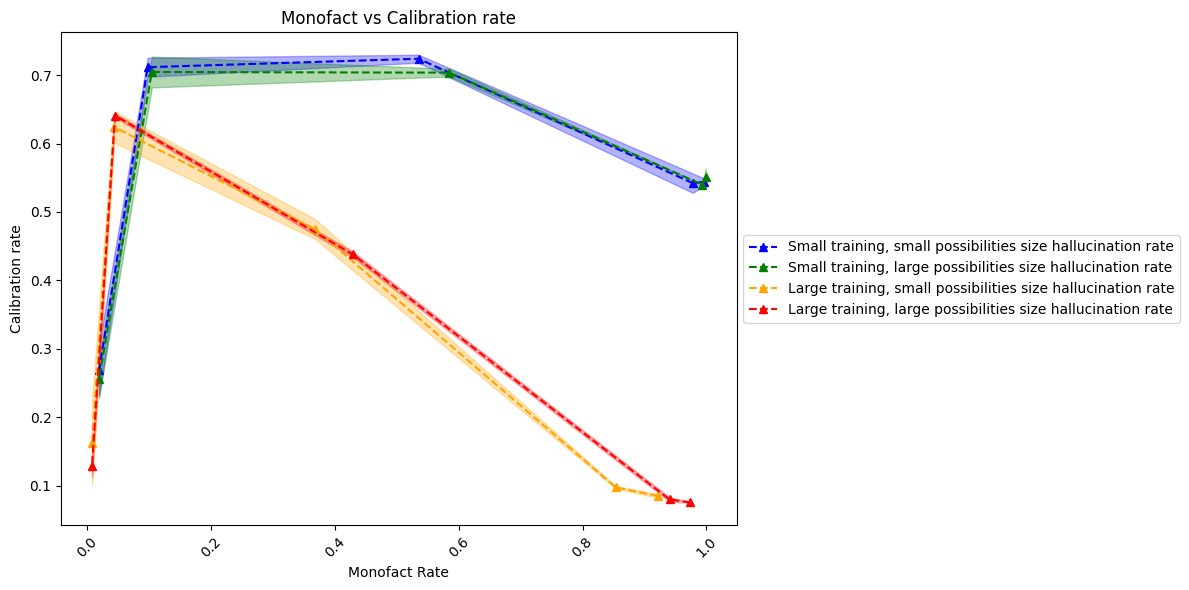

In [158]:
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","green",marker="^",linestyle="--",label="Small training, large possibilities size hallucination rate")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size hallucination rate")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4_calibration,"monofact_rate_mean","miscalibration_rate_mean","miscalibration_rate_std","red",marker="^",linestyle="--",label="Large training, large possibilities size hallucination rate")

# Add labels and title
ax.set_xlabel('Monofact Rate')
ax.set_ylabel('Calibration rate')
ax.set_title('Monofact vs Calibration rate')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

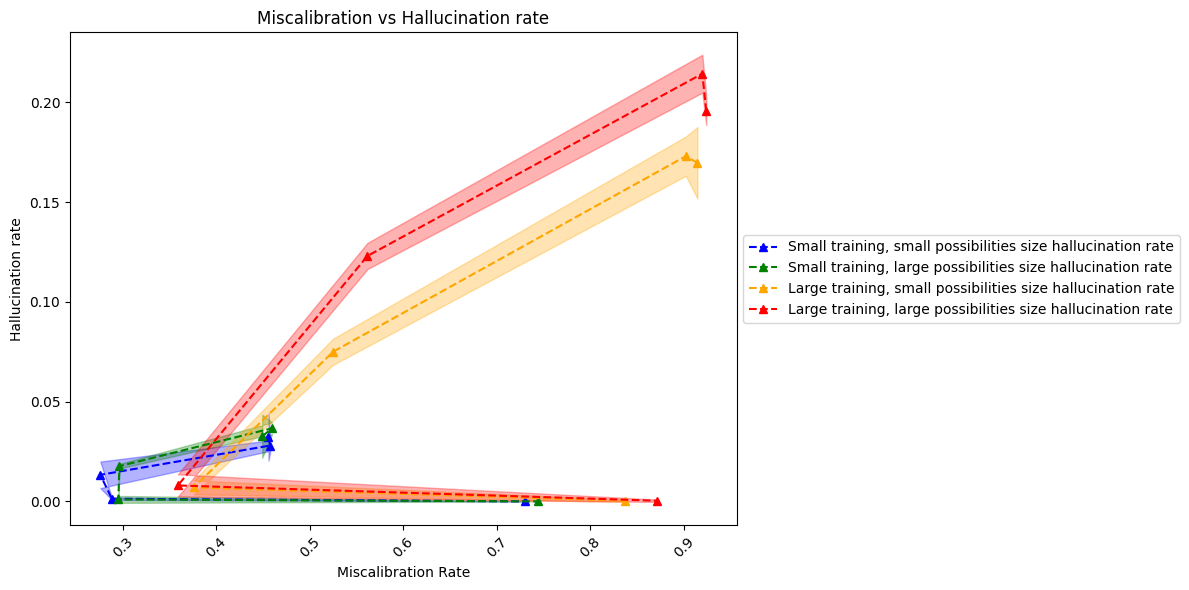

In [148]:
fig, ax = plt.subplots(figsize=(12, 6))

# # Plot mean for result1
# plot_data.plot(x='zipf_alpha', y='monofact_rate_mean', marker='o', linestyle='-', ax=ax, label='Result1 Mean')
# ax.fill_between(plot_data['zipf_alpha'], 
#                 plot_data['monofact_rate_mean'] - plot_data['monofact_rate_std'], 
#                 plot_data['monofact_rate_mean'] + plot_data['monofact_rate_std'], 
#                 color='blue', alpha=0.3)

# Small training size
# Small possibilities size
#plot_line(ax,plot_data_1,"monofact_rate_mean","monofact_rate_mean","monofact_rate_std","blue",marker="o",linestyle="-",label="Small training, small possibilities size monofact rate")
plot_line(ax,plot_data_1,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","blue",marker="^",linestyle="--",label="Small training, small possibilities size hallucination rate")
# Large possibilities size
#plot_line(ax,plot_data_2,"monofact_rate","monofact_rate_mean","monofact_rate_std","green",marker="o",linestyle="-",label="Small training, large possibilities size monofact rate")
plot_line(ax,plot_data_2,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","green",marker="^",linestyle="--",label="Small training, large possibilities size hallucination rate")

# Large training size
# Small possibilities size
#plot_line(ax,plot_data_3,"monofact_rate","monofact_rate_mean","monofact_rate_std","orange",marker="o",linestyle="-",label="Large training, small possibilities size monofact rate")
plot_line(ax,plot_data_3,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","orange",marker="^",linestyle="--",label="Large training, small possibilities size hallucination rate")
# Large possibilities size 
#plot_line(ax,plot_data_4,"monofact_rate","monofact_rate_mean","monofact_rate_std","red",marker="o",linestyle="-",label="Large training, large possibilities size monofact rate")
plot_line(ax,plot_data_4,"miscalibration_rate_mean","true_hallucinations_rate_mean","true_hallucinations_rate_std","red",marker="^",linestyle="--",label="Large training, large possibilities size hallucination rate")

# Add labels and title
ax.set_xlabel('Miscalibration Rate')
ax.set_ylabel('Hallucination rate')
ax.set_title('Miscalibration vs Hallucination rate')
ax.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()